![Astrofisica Computacional](../logo.png)

---

## Linear Fit with SciKit-Learn Example 2


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### About this notebook

In this worksheet, we will use the `scikit-learn` package split a sample database of 88 supermassive black holes into train and test sets in order to implement a linear model.

---

In [1]:
import numpy as np
from matplotlib import pyplot as plt
#import seaborn as sns
#sns.set()
import pandas as pd
from astropy.io import ascii

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# No warnings
import warnings
warnings.filterwarnings('ignore')

### Green and Ho data

Consider the dataset reported by Greene and Ho (2006), containing the features of 88 galaxies. 

Greene, J. E. and Ho, L. C. *The MBH − σ∗ Relation in Local Active Galaxies*. ApJ 641 L21 (2006)
https://ui.adsabs.harvard.edu/abs/2006ApJ...641L..21G/abstract

The dataset is available online in various formats at

http://vizier.cfa.harvard.edu/viz-bin/VizieR?-source=J/ApJ/641/L21.


We read the data using the `astropy.io.ascii` function.

In [2]:
data = ascii.read('SMBHData/table1.dat', readme='SMBHData/ReadMe')
data

Name,z,sigma*,e_sigma*,n_sigma*,FWHM,e_FWHM,logL,e_logL,logM,E_logM,e_logM
,,km / s,km / s,,km / s,km / s,[10-7W],[10-7W],dex(Msun),dex(Msun),dex(Msun)
str24,float64,float64,float64,str1,int64,int64,float64,float64,float64,float64,float64
SDSS J000805.62+145023.4,0.0454,140.0,27.0,--,7610,380,41.13,0.04,7.7,--,0.1
SDSS J004236.86-104921.8,0.0419,78.4,10.0,--,1960,97,41.58,0.14,6.7,--,0.1
SDSS J011703.58+000027.3,0.0456,98.8,16.0,--,2270,110,41.45,0.08,6.8,--,0.1
SDSS J020459.25-080816.0,0.0772,121.0,9.4,a,3720,180,41.13,0.05,7.0,--,0.1
SDSS J020615.99-001729.1,0.0426,216.0,30.0,--,3860,190,41.91,0.07,7.5,--,0.1
SDSS J021011.49-090335.5,0.0414,122.0,12.0,a,2450,120,41.24,0.07,6.7,--,0.1
...,...,...,...,...,...,...,...,...,...,...,...
NGC 4051,0.00234,88.9,2.9,--,--,--,--,--,5.99,0.17,0.2


Now, we convert the astropy Table to a pandas dataframe using the `.to_pandas()` method. Details at

https://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table.to_pandas

In [3]:
df = data.to_pandas()
df

,Name,z,sigma*,e_sigma*,n_sigma*,FWHM,e_FWHM,logL,e_logL,logM,E_logM,e_logM
0,SDSS J000805.62+145023.4,0.045400,140.0,27.0,NaN,7610,380,41.13,0.04,7.70,NaN,0.10
1,SDSS J004236.86-104921.8,0.041900,78.4,10.0,NaN,1960,97,41.58,0.14,6.70,NaN,0.10
2,SDSS J011703.58+000027.3,0.045600,98.8,16.0,NaN,2270,110,41.45,0.08,6.80,NaN,0.10
3,SDSS J020459.25-080816.0,0.077200,121.0,9.4,a,3720,180,41.13,0.05,7.00,NaN,0.10
4,SDSS J020615.99-001729.1,0.042600,216.0,30.0,NaN,3860,190,41.91,0.07,7.50,NaN,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...
83,NGC 4151,0.003320,96.8,2.9,NaN,<NA>,<NA>,NaN,NaN,6.91,0.17,0.29
84,NGC 5548,0.017200,198.0,11.0,NaN,<NA>,<NA>,NaN,NaN,7.81,0.02,0.02
85,NGC 7469,0.016300,133.0,4.8,NaN,<NA>,<NA>,NaN,NaN,6.49,0.16,0.27
86,POX 52,0.021800,36.0,5.0,NaN,<NA>,<NA>,NaN,NaN,5.20,NaN,0.30


In [4]:
df.describe()

,z,sigma*,e_sigma*,FWHM,e_FWHM,logL,e_logL,logM,E_logM,e_logM
count,88.000000,88.000000,88.000000,71.000000,71.000000,71.000000,71.000000,88.00000,15.000000,88.000000
mean,0.048665,117.142045,11.805682,3206.056338,210.760563,41.504225,0.078028,6.86625,0.140667,0.189886
std,0.032562,48.285108,5.308383,1759.679743,191.219953,0.663268,0.041700,0.72825,0.074303,0.172470
min,0.000947,30.000000,2.900000,810.000000,41.000000,40.100000,0.030000,4.90000,0.020000,0.020000
25%,0.027750,87.025000,7.750000,1905.000000,110.000000,41.155000,0.050000,6.30000,0.100000,0.100000
50%,0.042250,113.500000,12.000000,2970.000000,160.000000,41.510000,0.070000,7.00000,0.120000,0.100000
75%,0.062200,139.250000,15.000000,3870.000000,210.000000,41.860000,0.090000,7.40750,0.170000,0.200000
max,0.184000,268.000000,30.000000,8240.000000,1190.000000,43.610000,0.200000,8.52000,0.310000,1.060000


The dataframe includes data from 88 supermassive black holes. The columns correspond to

**z** : Redshift \
**sigma**\* : Stellar velocity dispersion \
**e_sigma**\* : Formal uncertainty in sigma* \
**FWHM** : H<sub>$\alpha$</sub> Full-Width at Half Maximum \
**e_FWHM** : Formal uncertainty in FWHM \
**logL** : $\log_{10}$ of H<sub>$\alpha$</sub> luminosity in erg/s \
**e_logL** : Formal uncertainty in logL \
**logM** : $\log_{10}$ of the Black Hole mass \
**E_logM** : Formal (upper limit) uncertainty in logM \
**e_logM** : Formal (lower limit) uncertainty in logM 


We will make a linear fit between the variables $\log M$ and $\log \left( \frac{\sigma_*}{\sigma_0} \right)$ and between the varibles $\log M$ and $\log  \text{FWHM} $, where $\sigma_0 = 200.$ is a reference value given by the authors. Hence, we add the corresponding columns to the dataframe.

In [5]:
sigma0 = 200.
df['logsigma*'] = np.log10(df['sigma*']/sigma0)
df['logFWHM'] = np.log10(df['FWHM'])
df.describe()

,z,sigma*,e_sigma*,FWHM,e_FWHM,logL,e_logL,logM,E_logM,e_logM,logsigma*,logFWHM
count,88.000000,88.000000,88.000000,71.000000,71.000000,71.000000,71.000000,88.00000,15.000000,88.000000,88.000000,71.000000
mean,0.048665,117.142045,11.805682,3206.056338,210.760563,41.504225,0.078028,6.86625,0.140667,0.189886,-0.272206,3.440999
std,0.032562,48.285108,5.308383,1759.679743,191.219953,0.663268,0.041700,0.72825,0.074303,0.172470,0.195820,0.246118
min,0.000947,30.000000,2.900000,810.000000,41.000000,40.100000,0.030000,4.90000,0.020000,0.020000,-0.823909,2.908485
25%,0.027750,87.025000,7.750000,1905.000000,110.000000,41.155000,0.050000,6.30000,0.100000,0.100000,-0.361386,3.279893
50%,0.042250,113.500000,12.000000,2970.000000,160.000000,41.510000,0.070000,7.00000,0.120000,0.100000,-0.246038,3.472756
75%,0.062200,139.250000,15.000000,3870.000000,210.000000,41.860000,0.090000,7.40750,0.170000,0.200000,-0.157237,3.587710
max,0.184000,268.000000,30.000000,8240.000000,1190.000000,43.610000,0.200000,8.52000,0.310000,1.060000,0.127105,3.915927


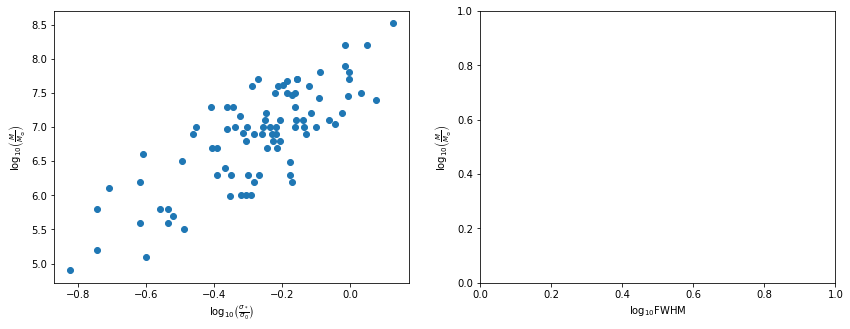

In [7]:

fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].scatter(df['logsigma*'], df['logM'])
ax[0].set_xlabel(r'$\log _{10} \left(\frac{\sigma_*}{\sigma_0} \right)$')
ax[0].set_ylabel(r'$\log _{10} \left(\frac{M}{M_{\odot}} \right)$')

#ax[1].scatter(df['logFWHM'], df['logM'])
ax[1].set_xlabel(r'$\log _{10}$FWHM')
ax[1].set_ylabel(r'$\log _{10} \left(\frac{M}{M_{\odot}} \right)$')

plt.show()

### Linear Fit using  `scikit-learn`

From the `scikit-learn.linear_model` package, we will import the function `LinearRegression`. Complete documentation about it can be found at

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

This function fits a linear model to minimize the residual sum of squares between the observed targets in the dataset and the targets predicted by the linear approximation (ordinary least squares fit).

Before making the fit, we need to prepare our data. In order to apply the fit easily, we will define two new dataframes with the important features for the linear model. It is usual to use the capital letter X to identify the independent parameter data, because in general it is an array (for multidimensional fit).

### The $M_{BH}$ - $\sigma_*$ Relation

In [8]:
Xdf = df[['logsigma*']]
ydf = df[['logM']]

Lets check that all 88 samples have both values (if there is a missing value, we have to handle that sample in some way) 

In [9]:
Xdf.describe() 

,logsigma*
count,88.000000
mean,-0.272206
std,0.195820
min,-0.823909
25%,-0.361386
50%,-0.246038
75%,-0.157237
max,0.127105


In [10]:
ydf.describe()

,logM
count,88.00000
mean,6.86625
std,0.72825
min,4.90000
25%,6.30000
50%,7.00000
75%,7.40750
max,8.52000


Since all samples are OK, we will separate the data frame into two sets, a train set and a test set. We will use the function `train_test_split` function from the `sklearn.model_selection` package. We will use a size of 15% for the test set. More information on this function at

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xdf, ydf, random_state=55, test_size=0.15)

Let see what we obtain:

In [12]:
X_train.shape , y_train.shape

((74, 1), (74, 1))

In [13]:
X_test.shape , y_test.shape

((14, 1), (14, 1))

In [18]:
type(X_train)

pandas.core.frame.DataFrame

Now, we train the linear model

$y = a_1 + a_2 x$ ,

with the method `LinearRegression().fit()` and the training data

In [14]:
lr = LinearRegression().fit(X_train, y_train)

The parameters obtained from the lienar fit are recovered with the methods `.intercept_` (for $a_1$) and `.coef_` (for $a_2$).

In [15]:
lr.intercept_ , lr.coef_ 

(array([7.68028112]), array([[3.01739501]]))

Using the method `.score()`, which returns the coefficient of determination $R^2$ for the model, we obtain for the training and the testing sets the results

In [16]:
lr.score(X_train, y_train)

0.6282459735724475

In [17]:
lr.score(X_test, y_test)

0.5410866675608162

We can also predict the value for the $\log M$ given some data point(s) $x_{point}$ using the method `.predict()` of the linear model. For example,

In [19]:
X_point = np.array([[-0.1]]) 
y_point =lr.predict(X_point)
y_point

array([[7.37854162]])

In [24]:
X_points = np.array([[-0.1],[0.156]]) 
y_points =lr.predict(X_points)
y_points

array([[7.37854162],
       [8.15099474]])

Finally, we plot the linear fit to see the behavior together with the observational data.

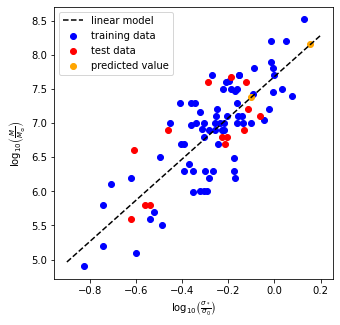

In [25]:
logsigma_range= np.linspace(-0.9, 0.2, 30)
logM = lr.intercept_[0] + lr.coef_[0]*logsigma_range


plt.figure(figsize=(5,5))
plt.scatter(X_train, y_train,label='training data', color='blue')
plt.scatter(X_test, y_test,label='test data', color='red')
plt.scatter(X_points, y_points,label='predicted value', color='orange')
plt.plot(logsigma_range, logM,'--k', label='linear model')

plt.xlabel(r'$\log_{10} \left(\frac{\sigma_*}{\sigma_0}\right)$')
plt.ylabel(r'$\log_{10} \left( \frac{M}{M_{\odot}} \right)$')
plt.legend()
plt.show()

#### Score of the linear model depending on the train set size


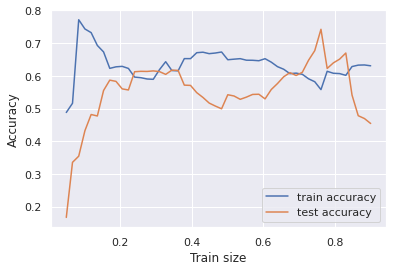

In [23]:
training_acc = []
test_acc = []

training_size = np.linspace(0.05,0.9,50)

for s in training_size:
    X_train, X_test, y_train, y_test = train_test_split(Xdf, ydf, random_state=55, train_size=s)
    lr = LinearRegression().fit(X_train, y_train)
    training_acc.append(lr.score(X_train,y_train))
    test_acc.append(lr.score(X_test,y_test))
    
plt.plot(training_size, training_acc, label='train accuracy')
plt.plot(training_size, test_acc, label='test accuracy')
plt.xlabel(r'Train size')
plt.ylabel(r'Accuracy')
plt.legend()
plt.show()

### The $M_{BH}$ - FWHM Relation

In [24]:
Xdf = df[['logFWHM']]
ydf = df[['logM']]

Lets check that all 88 samples have both values (if there is a missing value, we have to handle that sample in some way) 

In [25]:
Xdf.describe() 

,logFWHM
count,71.000000
mean,3.440999
std,0.246118
min,2.908485
25%,3.279893
50%,3.472756
75%,3.587710
max,3.915927


We only have 71 samples for the FWHM feature. Therefore we must handle the missing values.

In [26]:
newdf = df[['logM','logFWHM']]
newdf = newdf.apply (pd.to_numeric, errors='coerce')
newdf = newdf.dropna()
newdf.describe()

,logM,logFWHM
count,71.000000,71.000000
mean,6.819718,3.440999
std,0.660653,0.246118
min,5.100000,2.908485
25%,6.300000,3.279893
50%,6.900000,3.472756
75%,7.300000,3.587710
max,8.200000,3.915927


and redefine the variables for the fit

In [27]:
Xdf = newdf[['logFWHM']]
ydf = newdf[['logM']]

Since all samples are OK, we will separate the data frame into two sets, a train set and a test set. We will use the function `train_test_split` function from the `sklearn.model_selection` package. We will use a size of 10% for the test set. More information on this function at

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xdf, ydf, random_state=55, test_size=0.1)

Let see what we obtain:

In [29]:
X_train.shape , y_train.shape

((63, 1), (63, 1))

In [30]:
X_test.shape , y_test.shape

((8, 1), (8, 1))

Now, we train the linear model

$y = a_1 + a_2 x$ ,

with the method `LinearRegression().fit()` and the training data

In [31]:
lr = LinearRegression().fit(X_train, y_train)

The parameters obtained from the lienar fit are recovered with the methods `.intercept_` ($a_1$) and `.coef_` ($a_2$).

In [32]:
lr.intercept_ , lr.coef_ 

(array([-1.38219658]), array([[2.38521383]]))

Using the method `.score()`, which returns the coefficient of determination $R^2$ for the model, we obtain for the training and the testing sets the results

In [33]:
lr.score(X_train, y_train)

0.8491120441543842

In [34]:
lr.score(X_test, y_test)

0.8127009159505001

We can also predict the value for the $\log M$ given some data point(s) $x_{point}$ using the method `.predict()` of the linear model. For example,

In [35]:
X_point = np.array([[3.0]]) 
y_point =lr.predict(X_point)
y_point

array([[5.7734449]])

In [36]:
X_point = np.array([[3.25],[3.75]]) 
y_point =lr.predict(X_point)
y_point

array([[6.36974836],
       [7.56235527]])

Finally, we plot the linear fit to see the behavior together with the observational data.

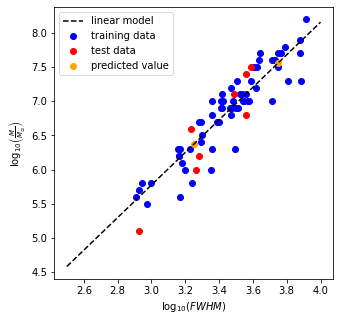

In [39]:
logFWHM_range= np.linspace(2.5, 4, 30)
logM = lr.intercept_[0] + lr.coef_[0]*logFWHM_range


plt.figure(figsize=(5,5))
plt.scatter(X_train, y_train,label='training data', color='blue')
plt.scatter(X_test, y_test,label='test data', color='red')
plt.scatter(X_point, y_point,label='predicted value', color='orange')
plt.plot(logFWHM_range, logM,'--k', label='linear model')

plt.xlabel(r'$\log_{10} \left(FWHM\right)$')
plt.ylabel(r'$\log_{10} \left( \frac{M}{M_{\odot}} \right)$')
plt.legend()
plt.show()

#### Score of the linear model depending on the train set size


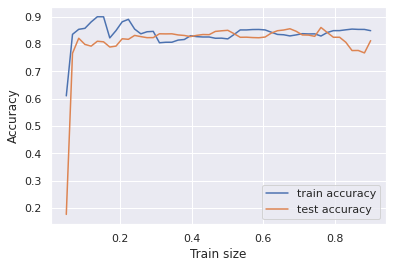

In [44]:
training_acc = []
test_acc = []

training_size = np.linspace(0.05,0.9,50)

for s in training_size:
    X_train, X_test, y_train, y_test = train_test_split(Xdf, ydf, random_state=55, train_size=s)
    lr = LinearRegression().fit(X_train, y_train)
    training_acc.append(lr.score(X_train,y_train))
    test_acc.append(lr.score(X_test,y_test))
    
plt.plot(training_size, training_acc, label='train accuracy')
plt.plot(training_size, test_acc, label='test accuracy')
plt.xlabel(r'Train size')
plt.ylabel(r'Accuracy')
plt.legend()
plt.show()